# Titanic dataset analysis

[source](https://www.kaggle.com/c/titanic/data)

### Data dictionary

#### VARIABLE DESCRIPTIONS:

```

survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
```

#### SPECIAL NOTES:
```
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```
### Some questions to answer
```
1) What is the median, min, and max age of the passengers in each of the 3 classes?
2) What are the characteristics of passengers who survived the disaster?
3) How many survived in each of the 3 classes?
4) Between the genders, what is the percentage of survivors?
5) What is the mean,median, min, and max fare paid across the 3 classes?
```


## 1) Load data dictionary

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

path = r'W:\Udacity\Introduction to programming Nano degree\data analysis elective'
filename = 'titanic_data.csv'

titanic_df = pd.read_csv(os.path.join(path, filename))


## 2) Check some basic features of the dataset: 
<br> a) number of features <br> b) number of observations in each field <br> c) the top 5 observations

In [50]:
print 'Number of features:', len(titanic_df.columns)
#print titanic_df.describe()
print 'Number of rows:'
print titanic_df.count()
titanic_df.head()

Number of features: 12
Number of rows:
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Some preliminary observations:

1) Feature Cabin is sparsely populated; there are only 204 values, and some observations have more than one cabin number separated by spaces to indicate family travelling onboard <br>
2) Age is another variable where only 714 observations are populated <br>
3) 3 values are missing for the Embarked variable

## 3) Data summaries, cleaning and transformation

Convert integer columns such as Passenger, Survived, and Pclass to string type

In [51]:
print titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [52]:
def convert_datatype(df, column_list, datatype_list):
    """
    Takes a dataframe, list of columns, and datatype list and converts the
    columns to the correct type
    Input: dataframe, column list to convert, and datatype list
    Output: return df
    """
    for column, datatype in zip(column_list, datatype_list):
        df[column] = df[column].astype(datatype)
    return df

In [53]:
column_list = ['PassengerId', 'Survived', 'Pclass']
datatype_list = [str] * 3
titanic_df = convert_datatype(titanic_df, column_list, datatype_list)

In [54]:
titanic_df.dtypes

PassengerId     object
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Per cent of survivors vs non survivors

In [55]:
100 * titanic_df['Survived'].value_counts(normalize=True)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

Proportion of survived is ${\dfrac{342}{(549+342)}}$ = 38%

In [56]:
100 * titanic_df['Pclass'].value_counts(normalize=True)

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

55% of the passengers were travelling in class 3

Are there any unsual values in the numeric fields such as Age and/or Fare?

In [57]:
def summary_statistics(df, field):
    """
    Computes summary statistics such as the mean, median, std, min, max
    Input: Dataframe, variable of interest
    Ouput: a tuple of mean, median, std, minimum, maximum
    """
    return (df[field].mean(), df[field].median(), df[field].std(), min(df[field]), max(df[field]))
#    print 'Mean:', df[field].mean()
#    print 'Median:', df[field].median()
#    print 'Minimum:', min(df[field])
#    print 'Maximum:', max(df[field])

In [58]:
print 'Mean age: {0}, Median age: {1}, Std dev: {2}, Minimum age: {3}, Maximum age: {4}'. format(*summary_statistics(titanic_df, 'Age'))
print 'Mean fare: {0}, Median fare: {1}, Std dev: {2}, Minimum fare: {3}, Maximum fare: {4}'. format(*summary_statistics(titanic_df, 'Fare'))

Mean age: 29.6991176471, Median age: 28.0, Std dev: 14.5264973323, Minimum age: 0.42, Maximum age: 80.0
Mean fare: 32.2042079686, Median fare: 14.4542, Std dev: 49.6934285972, Minimum fare: 0.0, Maximum fare: 512.3292


There isn't much variation in the ages. However, in the fares, we see significant variation. Interestingly, there is a minimum fare of 0

Let's look at the same variable's statistics by class

In [59]:
def group_summary_statistics(df, group_field, field):
    """
    Computes summary statistics such as the mean, median, std, min, and  max
    Input: Dataframe, groupby field, and variable of interest
    Ouput: a tuple of mean, median, std, minimum, maximum
    """
    return (df.groupby([group_field])[field].mean(), df.groupby([group_field])[field].median(), 
            df.groupby([group_field])[field].std(), df.groupby([group_field])[field].min(), 
            df.groupby([group_field])[field].max())


In [60]:
print 'Mean age: {0}, \nMedian age: {1}, \nStd dev: {2}, \nMinimum age: {3}, \nMaximum age: {4}'. format(*group_summary_statistics(titanic_df, 'Pclass', 'Age'))
print 'Mean fare: {0}, \nMedian fare: {1}, \nStd dev: {2}, \nMinimum fare: {3}, \nMaximum fare: {4}'. format(*group_summary_statistics(titanic_df, 'Pclass', 'Fare'))

Mean age: Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64, 
Median age: Pclass
1    37
2    29
3    24
Name: Age, dtype: float64, 
Std dev: Pclass
1    14.802856
2    14.001077
3    12.495398
Name: Age, dtype: float64, 
Minimum age: Pclass
1    0.92
2    0.67
3    0.42
Name: Age, dtype: float64, 
Maximum age: Pclass
1    80
2    70
3    74
Name: Age, dtype: float64
Mean fare: Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64, 
Median fare: Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64, 
Std dev: Pclass
1    78.380373
2    13.417399
3    11.778142
Name: Fare, dtype: float64, 
Minimum fare: Pclass
1    0
2    0
3    0
Name: Fare, dtype: float64, 
Maximum fare: Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64


With respect to the ages field, ages of passengers in class 2 and 3 are not very dissimilar, but the passengers in class 1 are relatively older than those in class 2 and class 3.

With respect to the fares, there is wide difference between class 2 and 3 and class 1. Also, there are passengers who have supposedly travelled for free across the classes.

Youngest and oldest survivors

In [61]:
print titanic_df.loc[titanic_df['Age'].argmin(), ['Name', 'Age', 'Sex', 'Pclass']]
print titanic_df.loc[titanic_df['Age'].argmax(), ['Name', 'Age', 'Sex', 'Pclass']]


Name      Thomas, Master. Assad Alexander
Age                                  0.42
Sex                                  male
Pclass                                  3
Name: 803, dtype: object
Name      Barkworth, Mr. Algernon Henry Wilson
Age                                         80
Sex                                       male
Pclass                                       1
Name: 630, dtype: object


How many passengers have travelled for 'free'?

In [62]:
titanic_df.groupby('Pclass')['Fare'].apply(lambda f: (f == 0)).sum()
#titanic_stowaway_df = titanic_df[titanic_df['Fare'] == 0]
#titanic_stowaway_df.groupby('Pclass').size()

15

15 passengers have travelled for 'free', which is 1.7% of all passengers

Frequency distribution of siblings and parents aboard

In [63]:
print titanic_df['SibSp'].value_counts().sort_index(axis=0, ascending=True)
print titanic_df['Parch'].value_counts().sort_index(ascending=True)
#no_family_df = titanic_df[(titanic_df['SibSp'] == 0) & (titanic_df['Parch'] == 0)]
#print len(no_family_df)

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64


Distribution by gender

In [64]:
100 * titanic_df['Sex'].value_counts(normalize=True)

male      64.758698
female    35.241302
Name: Sex, dtype: float64

Count of missing cabin data by Pclass

In [97]:
#titanic_df.groupby('Pclass')['Cabin'].value_counts()
titanic_df.groupby('Pclass')['Cabin'].apply(lambda x: x.isnull().sum())

Pclass
1     40
2    168
3    479
Name: Cabin, dtype: int64

Out of the 184 and 491 passengers travelling in class 2 and class 3 respectively, Cabin numbers for 168 (89%) and 479 (98%) passengers, respectively, are missing, which is astonishing; this could
be attributed to the fact that these cabins were the first to be affected when the ship collided with the iceberg, and hence there are no record of these cabins

As suggested by the reviewer, imputing age can impact the conclusions made with respect to Age. So,I will be removing the missing records 177(20%). The rest of the analysis will be carried out with the cleaned df.

In [70]:
titanic_cleaned_df = titanic_df[titanic_df['Age'].notnull()]

Impute missing ages by median age in each class

In [17]:
def impute_age(df, group, age):
    """
    Impute missing age values in each class by its median age
    Input: dataframe, group, age
    Output: None
    """
    df[age].fillna(df.groupby(group)[age].transform("median"), inplace=True)

In [41]:
#impute_age(titanic_df, 'Pclass', 'Age')
#titanic_df.groupby('Pclass')['Age'].median()
#titanic_df.columns
#titanic_df.drop('age1', axis=1, inplace=True)


Histogram of the ticket Fare

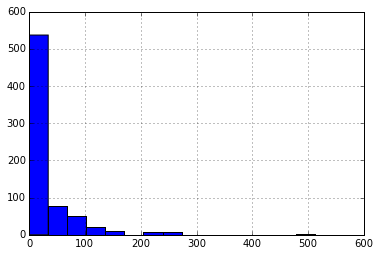

In [71]:
%matplotlib inline
titanic_cleaned_df['Fare'].hist(bins=15)

In [72]:
print 'Number of children under age 1 are', sum(titanic_cleaned_df['Age'] < 1)
print 'Number of male children 18 and under who didn''t make it\n', titanic_cleaned_df[(titanic_cleaned_df['Age'] <= 18) & (titanic_cleaned_df['Survived'] == '0') & (titanic_cleaned_df['Sex'] == 'male')].groupby('Survived')['Pclass'].value_counts()
print 'Number of female children 18 and under who didn''t make it\n', titanic_cleaned_df[(titanic_cleaned_df['Age'] <= 18) & (titanic_cleaned_df['Survived'] == '0') & (titanic_cleaned_df['Sex'] == 'female')].groupby('Survived')['Pclass'].value_counts()


Number of children under age 1 are 7
Number of male children 18 and under who didnt make it
Survived  Pclass
0         3         40
          2          6
          1          1
dtype: int64
Number of female children 18 and under who didnt make it
Survived  Pclass
0         3         21
          1          1
dtype: int64


In [73]:
100 * pd.crosstab(titanic_cleaned_df['Pclass'], titanic_cleaned_df['Survived']) / len(titanic_cleaned_df)

Survived,0,1
Pclass,,
1,8.963585,17.086835
2,12.605042,11.624650
3,37.815126,11.904762


In [74]:
np.percentile(titanic_cleaned_df['Age'], [5, 10, 25, 50, 75, 90])

array([  4.   ,  14.   ,  20.125,  28.   ,  38.   ,  50.   ])

### 4) Some visuals

In [47]:
def age_bucket(ages):
    """
    Create age buckets
    0 - 6
    7 - 20
    21 - 35
    36 - 50
    > 50
    Input: ages series
    Output: age bucket
    """
    if ages < 7:
        return '0-6 yrs'
    elif ages < 21:
        return '7-20 yrs'
    elif ages < 36:
        return '21-35 yrs'
    elif ages < 51:
        return '36-50 yrs'
    return '>50 yrs'

In [80]:
#titanic_cleaned_df.drop('AgeBucket', axis=1, inplace=True)
pd.options.mode.chained_assignment = None
titanic_cleaned_df['AgeBucket'] = titanic_cleaned_df['Age'].apply(age_bucket)


<Container object of 5 artists>

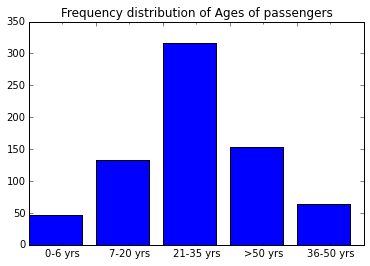

In [81]:
import matplotlib.ticker as ticker
#np.arange(len(titanic_df['AgeBucket'].unique()))

#plt.bar(np.arange(len(titanic_df['AgeBucket'].unique())), titanic_df['AgeBucket'].value_counts())

# titanic_df['AgeBucket'].value_counts()
# customer sort the Age Series
dict_sort = {'0-6 yrs': 1, 
             '7-20 yrs': 2,
            '21-35 yrs': 3,
            '36-50 yrs': 4,
            '>50 yrs': 5}
dict_agebucket = titanic_cleaned_df['AgeBucket'].value_counts().to_dict()
age_bucket = []

# http://stackoverflow.com/questions/16475384/rename-a-dictionary-key
for k in dict_sort.keys():
    dict_agebucket[dict_sort[k]] = dict_agebucket.pop(k)

for k in sorted(dict_agebucket.keys()):
    age_bucket.append(dict_agebucket[k])  
labels = []
labels.extend(sorted(dict_sort.keys(), key=lambda x: x[1]))

fig, ax = plt.subplots()

# http://stackoverflow.com/questions/17158382/centering-x-tick-labels-between-tick-marks-in-matplotlib
# change the x-axis ticks
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_locator(ticker.FixedLocator(np.arange(1.5,len(dict_sort)+1,1)))

ax.xaxis.set_minor_formatter(ticker.FixedFormatter(labels))
ax.set_title('Frequency distribution of Ages of passengers')

plt.bar(sorted(dict_sort.values()), age_bucket)

# http://stackoverflow.com/questions/9101497/matplotlib-bar-graph-x-axis-wont-plot-string-values
#plt.xticks(sorted(dict_sort.values()), labels)              

In [27]:
def custom_sort(agebucket):
    """
    Custom sort the AgeBucket df
    Input: agebucket df
    Ouput: custom sorted agebucket df
    """
    custom_dict = {'0-6 yrs': 1, 
             '7-20 yrs': 2,
            '21-35 yrs': 3,
            '36-50 yrs': 4,
            '>50 yrs': 5}
    agebucket['rank'] = agebucket['AgeBucket'].map(custom_dict)
    agebucket.sort_values(['Survived', 'rank'], ascending=True, inplace=True)
    return agebucket.drop('rank', axis=1)

In [28]:
from matplotlib.ticker import FuncFormatter
def groupby_plot(df, group_field, field, pos, title, axes):
    """
    Take a dataframe, groupby group_field and unstack the grouped df
    before plotting the bar chart by its position
    """
    label_list = []
    new_df = df[[group_field, field]]
    new_df_grouped = new_df.groupby(group_field)[field].value_counts().sort_index(level=[0,1]) / len(new_df)
    '''
    if field == 'AgeBucket':
        custom_df = new_df_grouped.reset_index(name='Prop')
        new_df_grouped = custom_sort(custom_df)
        new_df_grouped.reset_index()
        ax = new_df_grouped.groupby(group_field).plot(ax=axes[pos], kind='bar', stacked=False, title=title, rot=0)
    '''
    for idx, label in enumerate(list(new_df_grouped.index)):
#        print label
        label_list.append(new_df_grouped.ix[idx])
#    print label_list
#    label_list = (new_df.groupby(group_field)[field].value_counts() / len(new_df)).tolist()

    # as the unstack() operation resulted in elements being access in column major ordering
    # I reshaped the order for the label list
    label_array = np.array(label_list)
    r, c = new_df_grouped.unstack().shape
    label_array = label_array.reshape(c, r, order='F')

    # http://pbpython.com/simple-graphing-pandas.html
    ax = new_df_grouped.unstack().plot(ax=axes[pos], kind='bar', stacked=False, title=title, rot=0)
    # http://stackoverflow.com/questions/31357611/format-y-axis-as-percent
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'. format(y)))
    for rect, label in zip(ax.patches, label_array.flatten()):
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height()+0.003, '{:.0%}'.format(label), 
                ha='center', va='bottom', fontsize=8 )
#        ax.annotate(str(rect.get_height()), xy=(rect.get_x(), rect.get_height() + 0.005), 
#                    ha='center', va='center', textcoords='offset points')


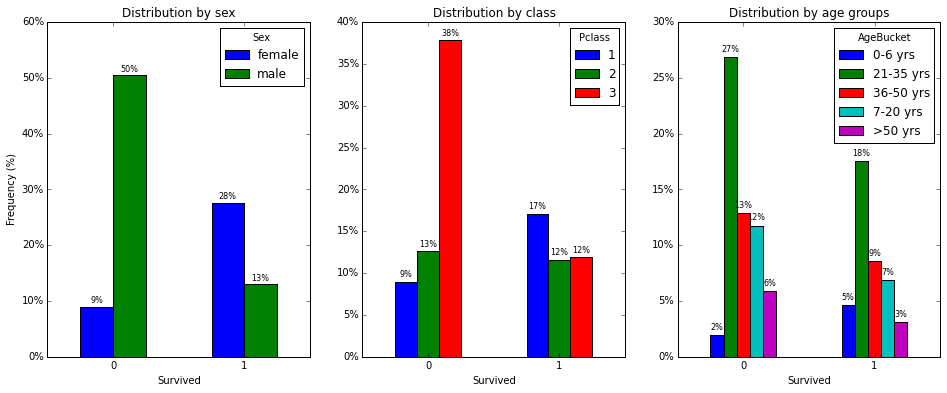

In [82]:
titles = ['Distribution by sex', 'Distribution by class', 'Distribution by age groups']
fields = ['Sex', 'Pclass', 'AgeBucket']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
for idx, title in enumerate(titles):
    groupby_plot(titanic_cleaned_df, 'Survived', fields[idx], idx, title, axes)
axes[0].set_ylabel('Frequency (%)')
    

#groupby_plot(titanic_df, 'Survived', 'Pclass', 1)
#groupby_plot(titanic_df, 'Survived', 'AgeBucket', 2)

Scatter plot between passenger Fare and Age

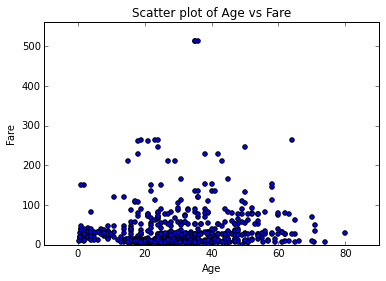

In [95]:
axes = plt.gca()
axes.set_ylim([titanic_cleaned_df['Fare'].min(), titanic_cleaned_df['Fare'].max() + 50])
plt.scatter(titanic_cleaned_df['Age'], titanic_cleaned_df['Fare'])
plt.title('Scatter plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

The plot shows no trend whatsoever; this suggests that there maybe no relationship between Fare and Age. Most of the Fare prices across the ages is below 100

Chi square test of independence to test for association between travelling in a certain class and surviving

The null hypothesis is that there is no association between survival and travelling in a specific class

The alternate hypothesiss is that there is an association between survival and travelling in a specific class

In [98]:
class_and_survived_array = titanic_cleaned_df.groupby('Survived')['Pclass'].value_counts().unstack().as_matrix()

In [99]:
# http://connor-johnson.com/2014/12/31/the-pearson-chi-squared-test-with-python-and-r/
import scipy.stats
chi2, p, ddof, expected = scipy.stats.chi2_contingency(class_and_survived_array)
print 'chi2: {}, p-value: {}, DoF: {}'.format(chi2, p, ddof)

chi2: 92.9014172114, p-value: 6.70986174976e-21, DoF: 2


At a 5% level of significance, the p-value is very significant; this suggests that there may be an association between the two variables: Survived and Pclass. However, despite having a significant p-value, we may need to perform a post-hoc test to determine whether there is significance across each of the 3 Pclass levels.
    

### 5) Findings

Some characteristics of survivors were:

1) They were women and children regardless of economic status<br>
2) Most survivors (male, female, adult, children) travelled 1st class<br>
3) Survivors were young between 21-35 years of age<br>

Some specific observations:

1) Overall, 290(40%) passengers survived

2) Among the survivors, (122)17% were in class 1, the highest among all the classes, while the worst affected class is class 3, with 270(38%) casualities.

3) Among those who survived 197(28%) were women and 93(13%) were men. In the group of non-survivors, 360(50%) were men and 64(9%) were women.

4) Within the age buckets, the group in the 21-35 yrs category had the maximum survivors 125(18%) and maximum non-survivors 192(27%)

5) The ratio of female survivors to female non-survivors is 3.1: 1 or roughly 3 survivors for 1 non-survivor, whereas, among the male the ratio of non-survivors to survivors is an astounding 3.9: 1, that is, 4 non-survivors for every survivor.

The limitations in my exploratory analysis maybe impacted by the presence of missing Age values that were removed, the presence of outliers in the Fare variable, and the fact that no rigourous statistical tests were performed to confirm association between Survival and the other features. Also, according to [Titanic facts](http://www.titanic-facts.com/passengers-on-the-titanic.html), there were 2228 passengers, which included 885 crew members, but this dataset has only 891 passenger records; this too may impact the overall analysis

### 6) Next steps
It will be interesting to build different statistical models to understand how good they are in predicting survival and 
in recognizing their respective limitations, given the nature of the dataset; it will also help me understand which features play an important role in deciding survivial, which the exploratory analsysis helped provide some clues.

### 6) Resources

[rename a dictionary key](http://stackoverflow.com/questions/16475384/rename-a-dictionary-key)<br>
[centering xtick labels](http://stackoverflow.com/questions/17158382/centering-x-tick-labels-between-tick-marks-in-matplotlib)<br>
[replace numeric labels with string labels](http://stackoverflow.com/questions/9101497/matplotlib-bar-graph-x-axis-wont-plot-string-values)<br>
[unstack pandas df before plotting](http://pbpython.com/simple-graphing-pandas.html)<br>
[format y-axis as a percent](http://stackoverflow.com/questions/31357611/format-y-axis-as-percent)<br>
[annotate a bar plot](http://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots)<br>
[multiple plots](http://matplotlib.org/users/pyplot_tutorial.html)<br>
[chi-square test of independence](http://connor-johnson.com/2014/12/31/the-pearson-chi-squared-test-with-python-and-r/)<br>